In [1]:
# Aliakbar Zarkoob, AKA "XIV"
# Gmail: XIV.Aliakbar.Zarkoob@gmail.com
# Telegram: @XIVAliakbar

import matplotlib.pyplot as plt


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def PlotRes(lon_l, lat_l, data_l, title_l, lon_r, lat_r, data_r, title_r, title_sup, save_flag, save_format, save_dir, save_filename, save_dpi, sci_cb):

    import os 
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import FuncFormatter
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    def format_ticks(x, pos):
        return f"{x:.0f}"
    
    if save_flag:
        if not os.path.isdir(save_dir):
            os.mkdir(save_dir)
    
    lon_l = np.unique(lon_l)
    lat_l = np.unique(lat_l)
    lon_l, lat_l = np.meshgrid(lon_l, lat_l)
    data_l = data_l.reshape((lon_l.shape[1], lon_l.shape[0])).T
    
    lat_r = np.unique(lat_r)
    lon_r = np.unique(lon_r)
    lon_r, lat_r = np.meshgrid(lon_r, lat_r)
    data_r = data_r.reshape((lon_r.shape[1], lon_r.shape[0])).T
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.Robinson()})

    ax1 = axes[0]
    ax1.set_title(title_l,fontsize=15)
    cmap = plt.cm.turbo
    mesh1 = ax1.pcolormesh(lon_l, lat_l, data_l, cmap=cmap, transform=ccrs.PlateCarree(), rasterized=True)
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar1 = plt.colorbar(mesh1, cax=cax1, orientation='horizontal')
    cbar1.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar1.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    ax2 = axes[1]
    ax2.set_title(title_r,fontsize=15)
    mesh2 = ax2.pcolormesh(lon_r, lat_r, data_r, cmap=cmap, transform=ccrs.PlateCarree(), rasterized=True)
    ax2.coastlines()
    ax2.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar2 = plt.colorbar(mesh2, cax=cax2, orientation='horizontal')
    cbar2.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar2.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    for ax in axes:
        gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
        gl.top_labels = False
        gl.right_labels = True
        gl.xlabel_style = {"fontsize": 10, "rotation": 0}
        gl.ylabel_style = {"fontsize": 10, "rotation": 0}
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER


    plt.suptitle(title_sup, fontsize=20)
    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 1.3])
    fig.subplots_adjust(wspace=0.1)

    if save_flag:
        plt.savefig(save_dir+save_filename+save_format, bbox_inches='tight', dpi=save_dpi)
    plt.show()
    
def PlotRes_single(lon, lat, data, title, save_flag, save_format, save_dir, save_filename, save_dpi, sci_cb):

    import os 
    import numpy as np
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import FuncFormatter
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    def format_ticks(x, pos):
        return f"{x:.0f}"
    
    if save_flag:
        if not os.path.isdir(save_dir):
            os.mkdir(save_dir)
    
    lon = np.unique(lon)
    lat = np.unique(lat)
    lon, lat = np.meshgrid(lon, lat)
    data = data.reshape((lon.shape[1], lon.shape[0])).T
    
    fig = plt.figure(figsize=(7, 3.5))
    ax = plt.axes(projection=ccrs.Robinson())

    plt.title(title,fontsize=15)
    cmap = plt.cm.turbo
    mesh1 = ax.pcolormesh(lon, lat, data, cmap=cmap, transform=ccrs.PlateCarree(), rasterized=True)

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.3, axes_class=plt.Axes)
    cbar = plt.colorbar(mesh1, cax=cax, orientation='horizontal')
    cbar.set_label('$\\frac{m^2}{s^2}$', fontsize=16)
    if sci_cb:
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")
    gl.top_labels = False
    gl.right_labels = True
    gl.xlabel_style = {"fontsize": 10, "rotation": 0}
    gl.ylabel_style = {"fontsize": 10, "rotation": 0}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


    plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 1.3])
    plt.subplots_adjust(wspace=0.1)

    if save_flag:
        plt.savefig(save_dir+save_filename+save_format, bbox_inches='tight', dpi=save_dpi)
    plt.show()

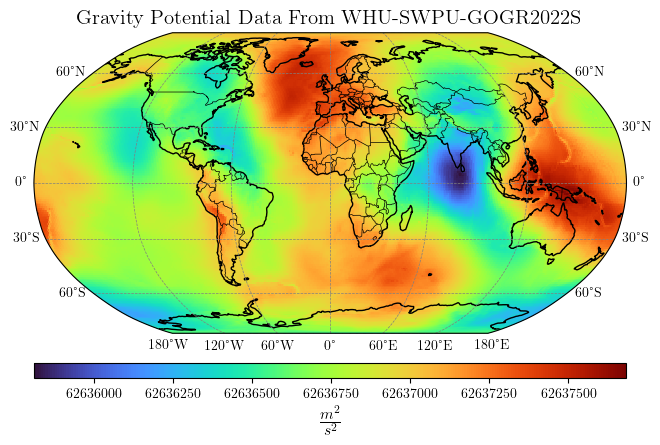

In [2]:
from scipy.io import loadmat

save_flag = False
suptitle_flag = True

save_format = '.pdf'
save_dir = './Plots/'
save_dpi = 50

mat_data = loadmat('Results01.mat')
main_data = mat_data['data_main']

# Gravity Potential Data From XGM2019
PlotRes_single(main_data[:, 0], main_data[:, 1], main_data[:, 2], 'Gravity Potential Data From WHU-SWPU-GOGR2022S',
               save_flag, save_format, save_dir, 'MainData', save_dpi, True)


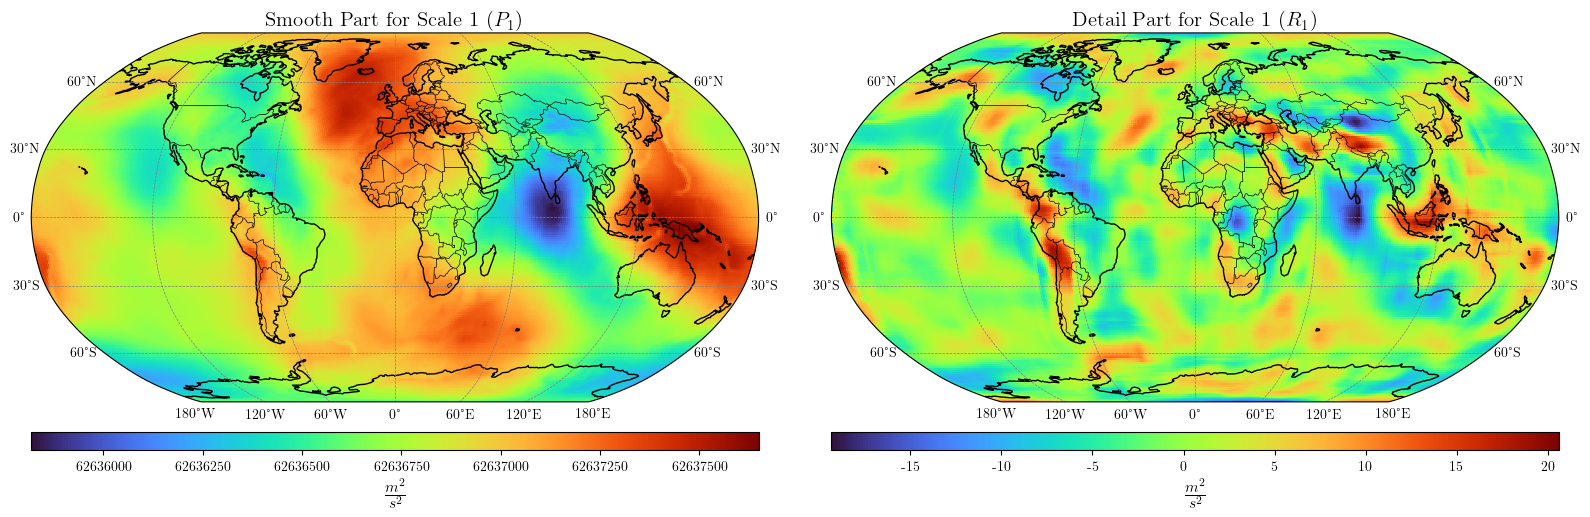

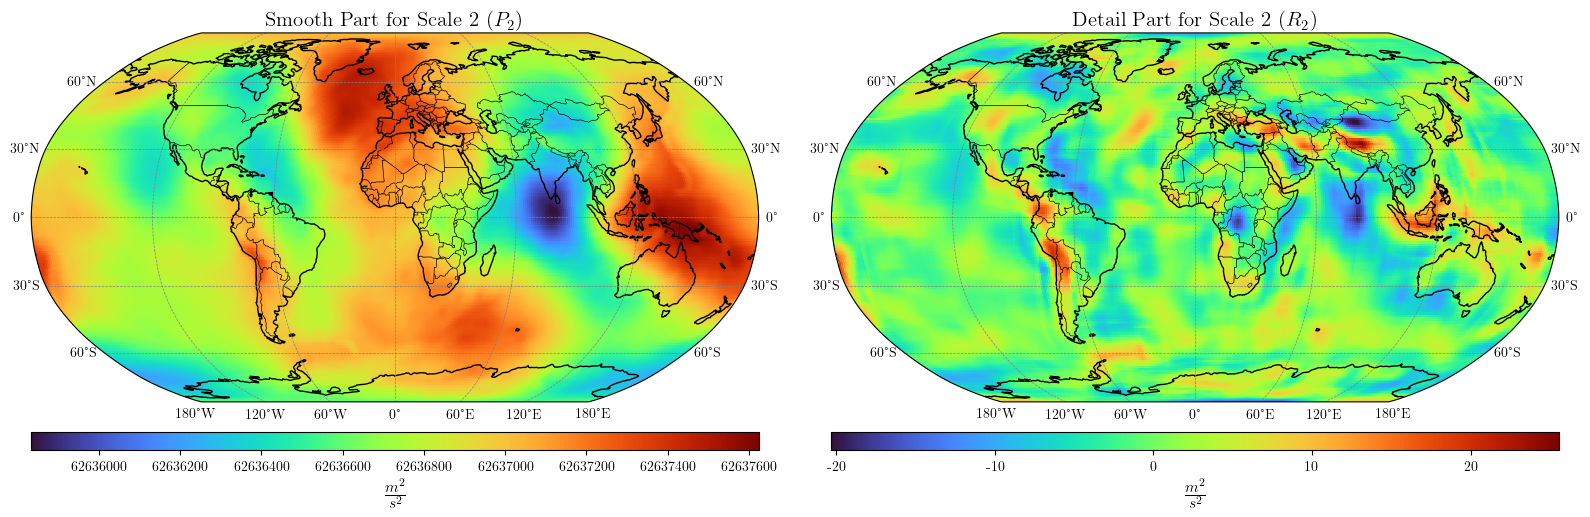

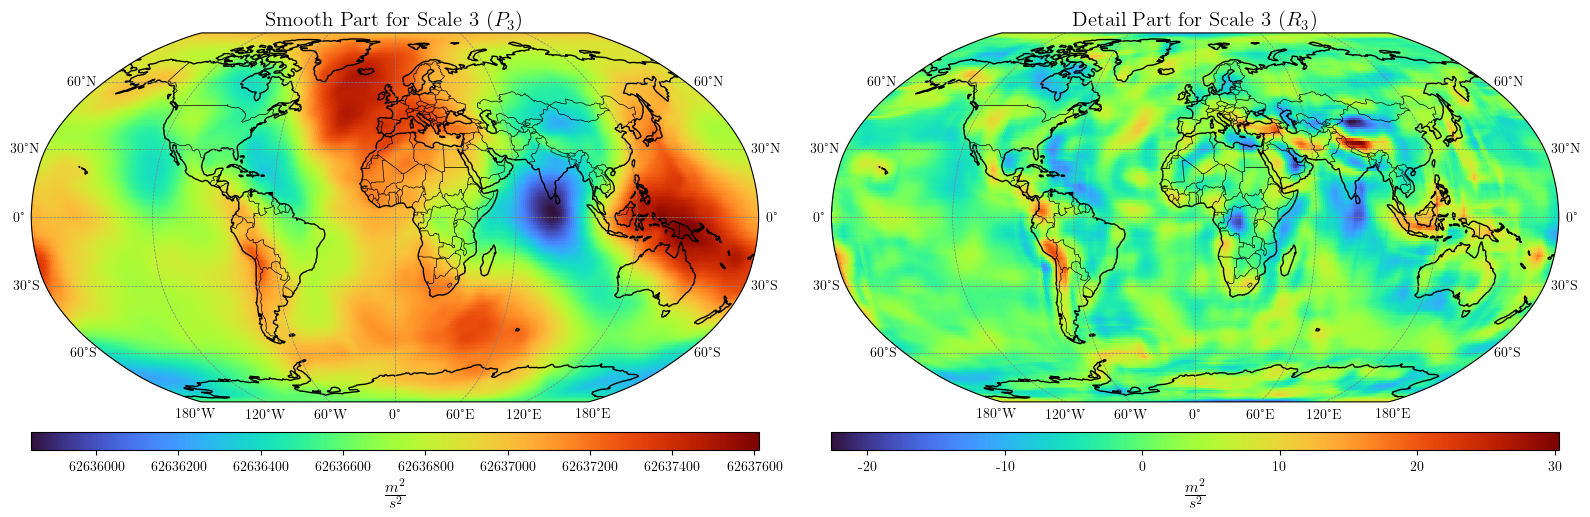

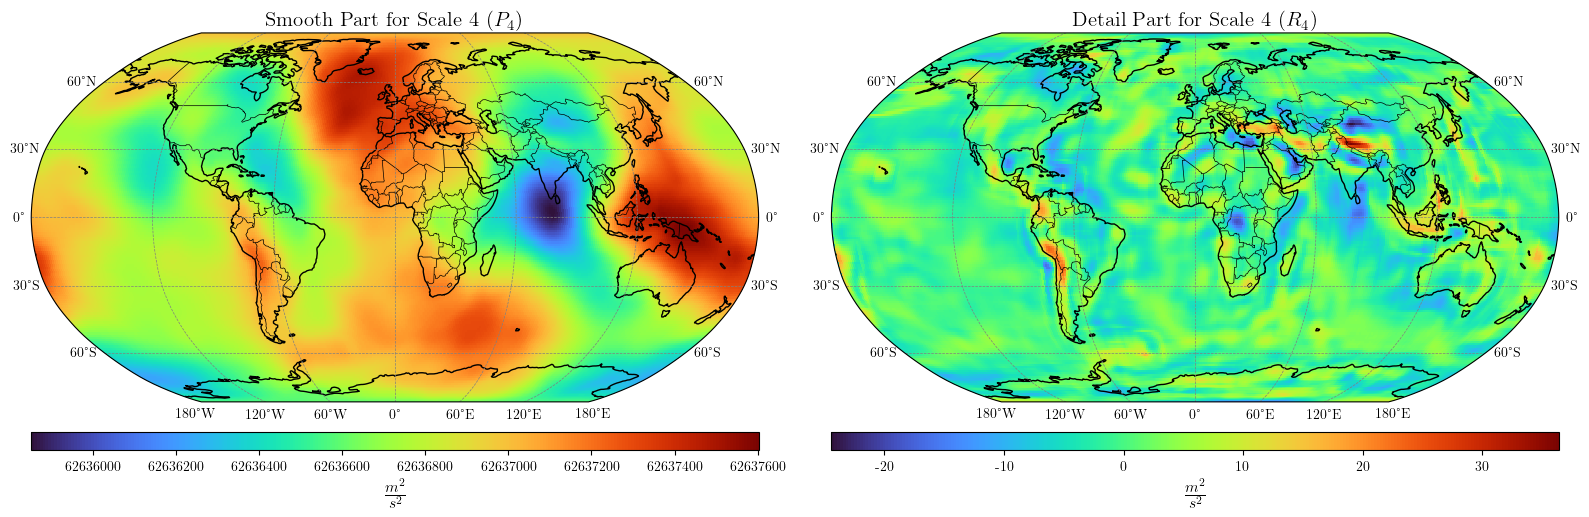

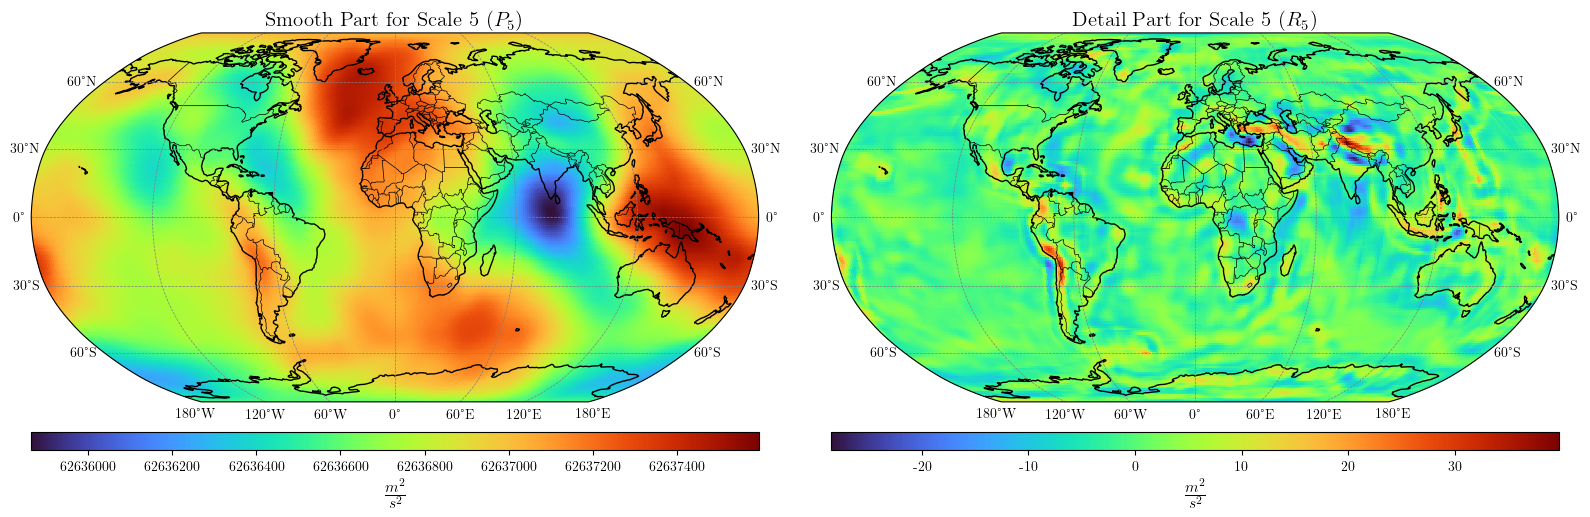

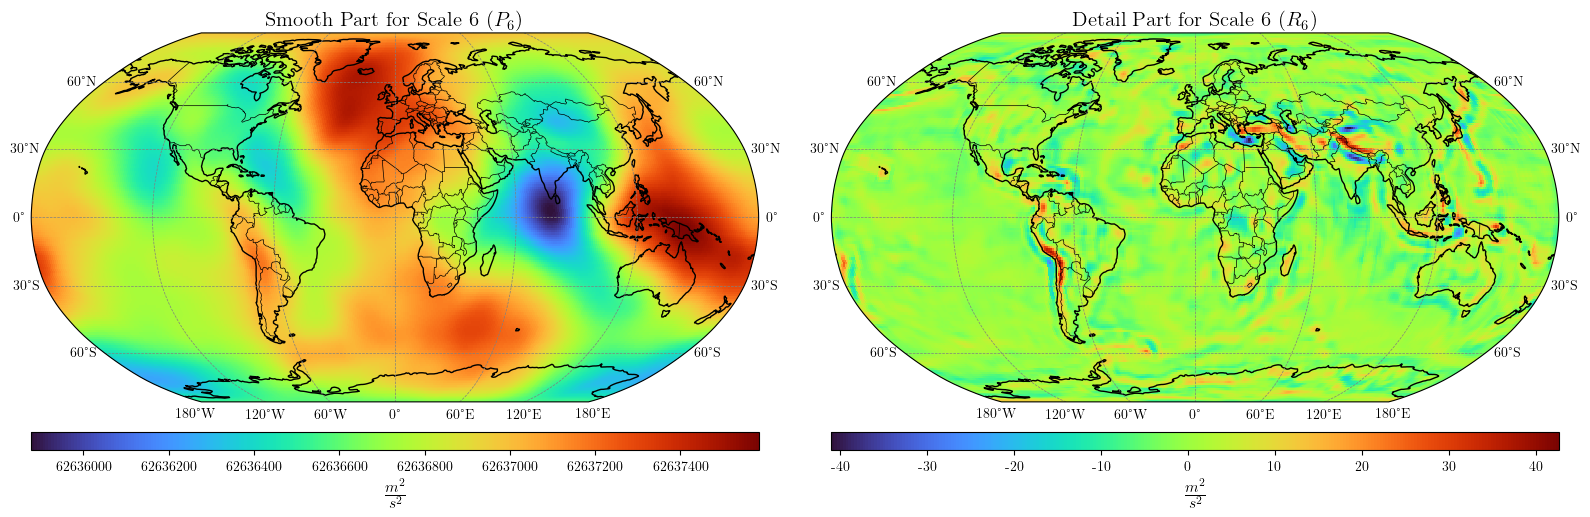

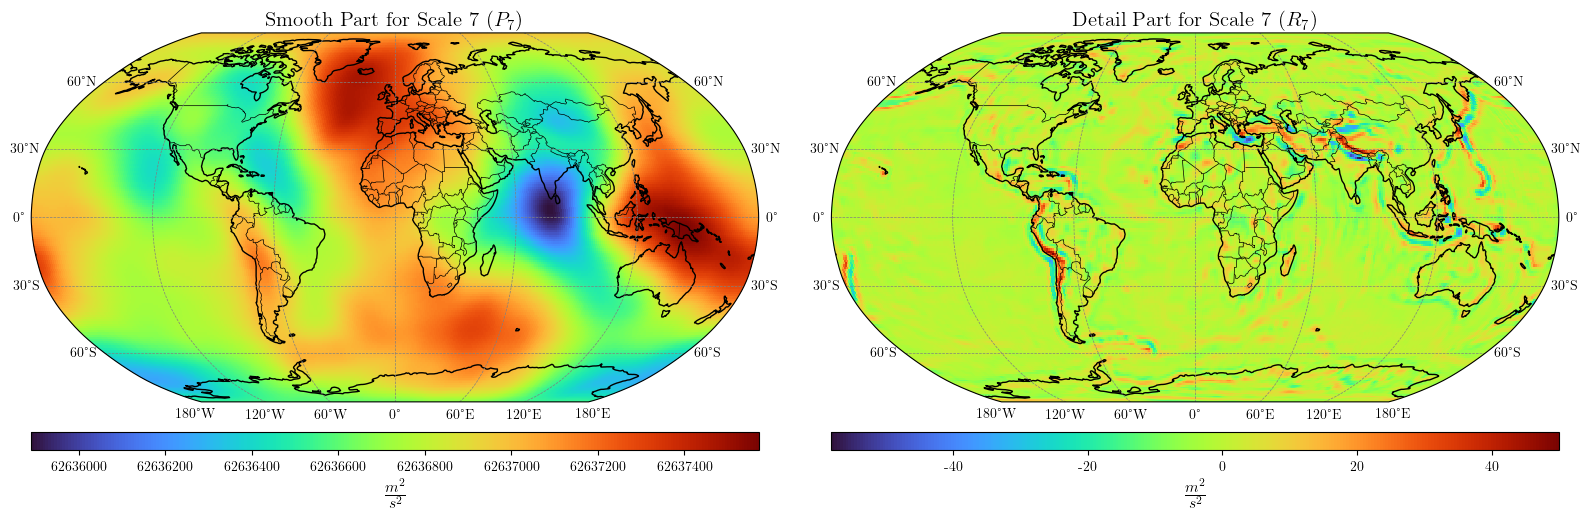

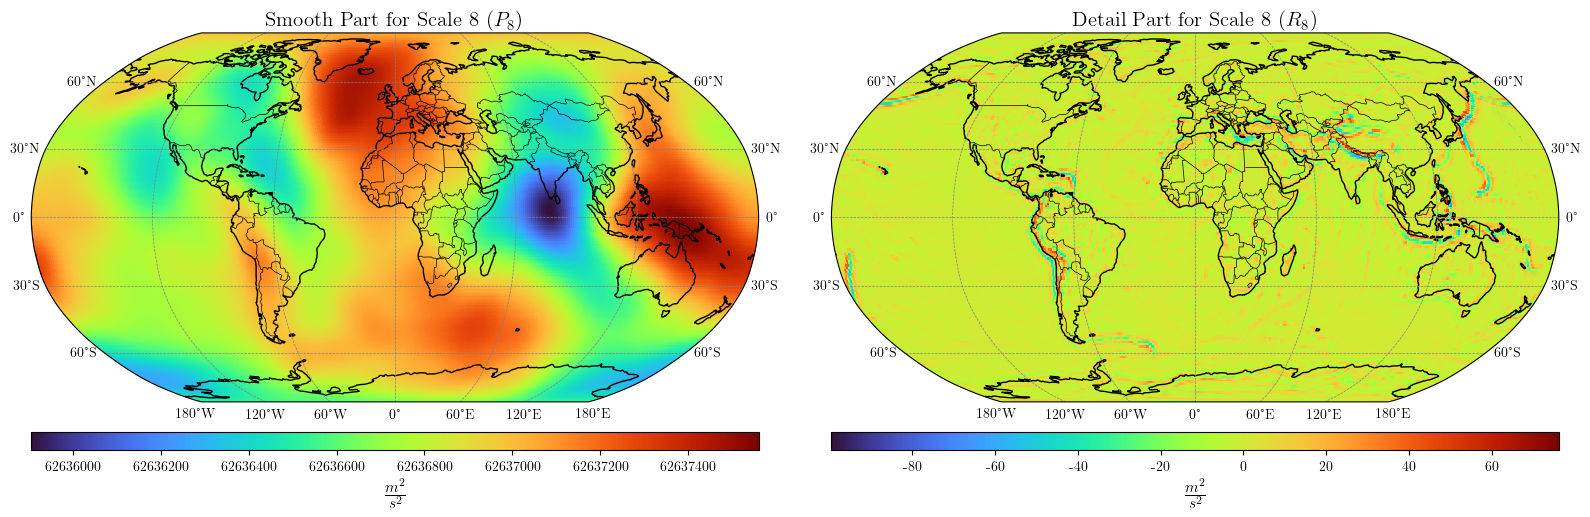

In [3]:
from scipy.io import loadmat

save_flag = False
suptitle_flag = False

save_format = '.pdf'
save_dir = './Plots/'
save_dpi = 72

mat_data = loadmat('Results01.mat')
main_data = mat_data['data_main']
scale = mat_data['scale']
wavelet = mat_data['wavelet']

for i in range(scale.shape[1]):
    
    if suptitle_flag:
        title_sup = f'Scale = {i+1}'
    else:
        title_sup = ''
        
    save_filename = f'Outputs_Scale{i+1}'
    
  
    PlotRes(main_data[:, 0], main_data[:, 1], scale[:, i], f'Smooth Part for Scale {i+1} ($P_{i+1}$)', 
            main_data[:, 0], main_data[:, 1], wavelet[:, scale.shape[1]-1-i], f'Detail Part for Scale {i+1} ($R_{i+1}$)',
            title_sup, save_flag, save_format, save_dir, save_filename, save_dpi, True)
    
    